# Packages

Import required packages

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load Data

OVDE TREBA OBJASNJENJE

In [2]:
df = pd.read_csv('../data/2015/SWaT_Dataset_Attack_v0.csv')

# Dataset Start Time and End Time
df_time_start = np.array('2015-12-28T10:00:00', dtype=np.datetime64)
df_time_end = np.array('2016-01-02T02:59:59', dtype=np.datetime64)

# Visualization Start Time and End Time
time_start = np.array('2015-12-29T00:00:00', dtype=np.datetime64)
time_end = np.array('2015-12-30T00:00:00', dtype=np.datetime64)
time_len = int((time_end - time_start) / np.timedelta64(1, 's'))

In [4]:
print(df.shape)
df.head()

(449919, 53)


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


## Detect anomalies from input data

We can get the information about attacks from SWaT dataset `data/2015/List_of_attacks_Final.xlsx. They represent are divided into groups:

- Single stage single point (SSSP)
- Single stage multi point (SSMP)
- Multi stage single point (MSSP)
- Multi stage multi point attacks (MSMP)
 

In [28]:
xlsx = pd.read_excel ('../data/2015/List_of_attacks_Final.xlsx', sheet_name='Sheet1')
anomalies = []
for index, row in xlsx.iterrows():
    try:
        # skip if there is no attack
        try:
            tmp = int(row["Attack #"])
        except:
            continue

        # skip if there is no attack
        tmp = row["Attack Point"].split(",")
        if row["Attack Point"] == "No Physical Impact Attack":
            continue

        # extract attack start time
        start_time = str(row["Start Time"])
        tmp = start_time.split(" ")
        start_time = tmp[0] + "T" + tmp[1]

        # extract attack end time
        end_time = str(row["End Time"])
        end_time = tmp[0] + "T" + end_time

        # extract attack points
        attack_points = {}
        for i in tmp:
            i = i.strip(" ")
            i = i.upper()
            attack_points[i] = ""
        attack_points = list(attack_points.keys())

        # define anomaly
        anomaly = {
            "start_time": np.array(start_time, dtype=np.datetime64),
            "end_time": np.array(end_time, dtype=np.datetime64),
            "attack_points": attack_points,
        }

        anomalies.append(anomaly)
    except:
        print(str(sys.exc_info()))
        print(row)

start_time=2015-12-28T10:29:14, end_time=2015-12-28T10:44:53, attack_points=['MV-101']

start_time=2015-12-28T10:51:08, end_time=2015-12-28T10:58:30, attack_points=['P-102']

start_time=2015-12-28T11:22:00, end_time=2015-12-28T11:28:22, attack_points=['LIT-101']

start_time=2015-12-28T11:47:39, end_time=2015-12-28T11:54:08, attack_points=['MV-504']

start_time=2015-12-28T12:00:55, end_time=2015-12-28T12:04:10, attack_points=['AIT-202']

start_time=2015-12-28T12:08:25, end_time=2015-12-28T12:15:33, attack_points=['LIT-301']

start_time=2015-12-28T13:10:10, end_time=2015-12-28T13:26:13, attack_points=['DPIT-301']

start_time=2015-12-28T14:16:20, end_time=2015-12-28T14:19:00, attack_points=['FIT-401']

start_time=2015-12-28T14:19:00, end_time=2015-12-28T14:28:20, attack_points=['FIT-401']

start_time=2015-12-29T11:11:25, end_time=2015-12-29T11:15:17, attack_points=['MV-304']

start_time=2015-12-29T11:35:40, end_time=2015-12-29T11:42:50, attack_points=['MV-303']

start_time=2015-12-29T11:5

## Plot

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


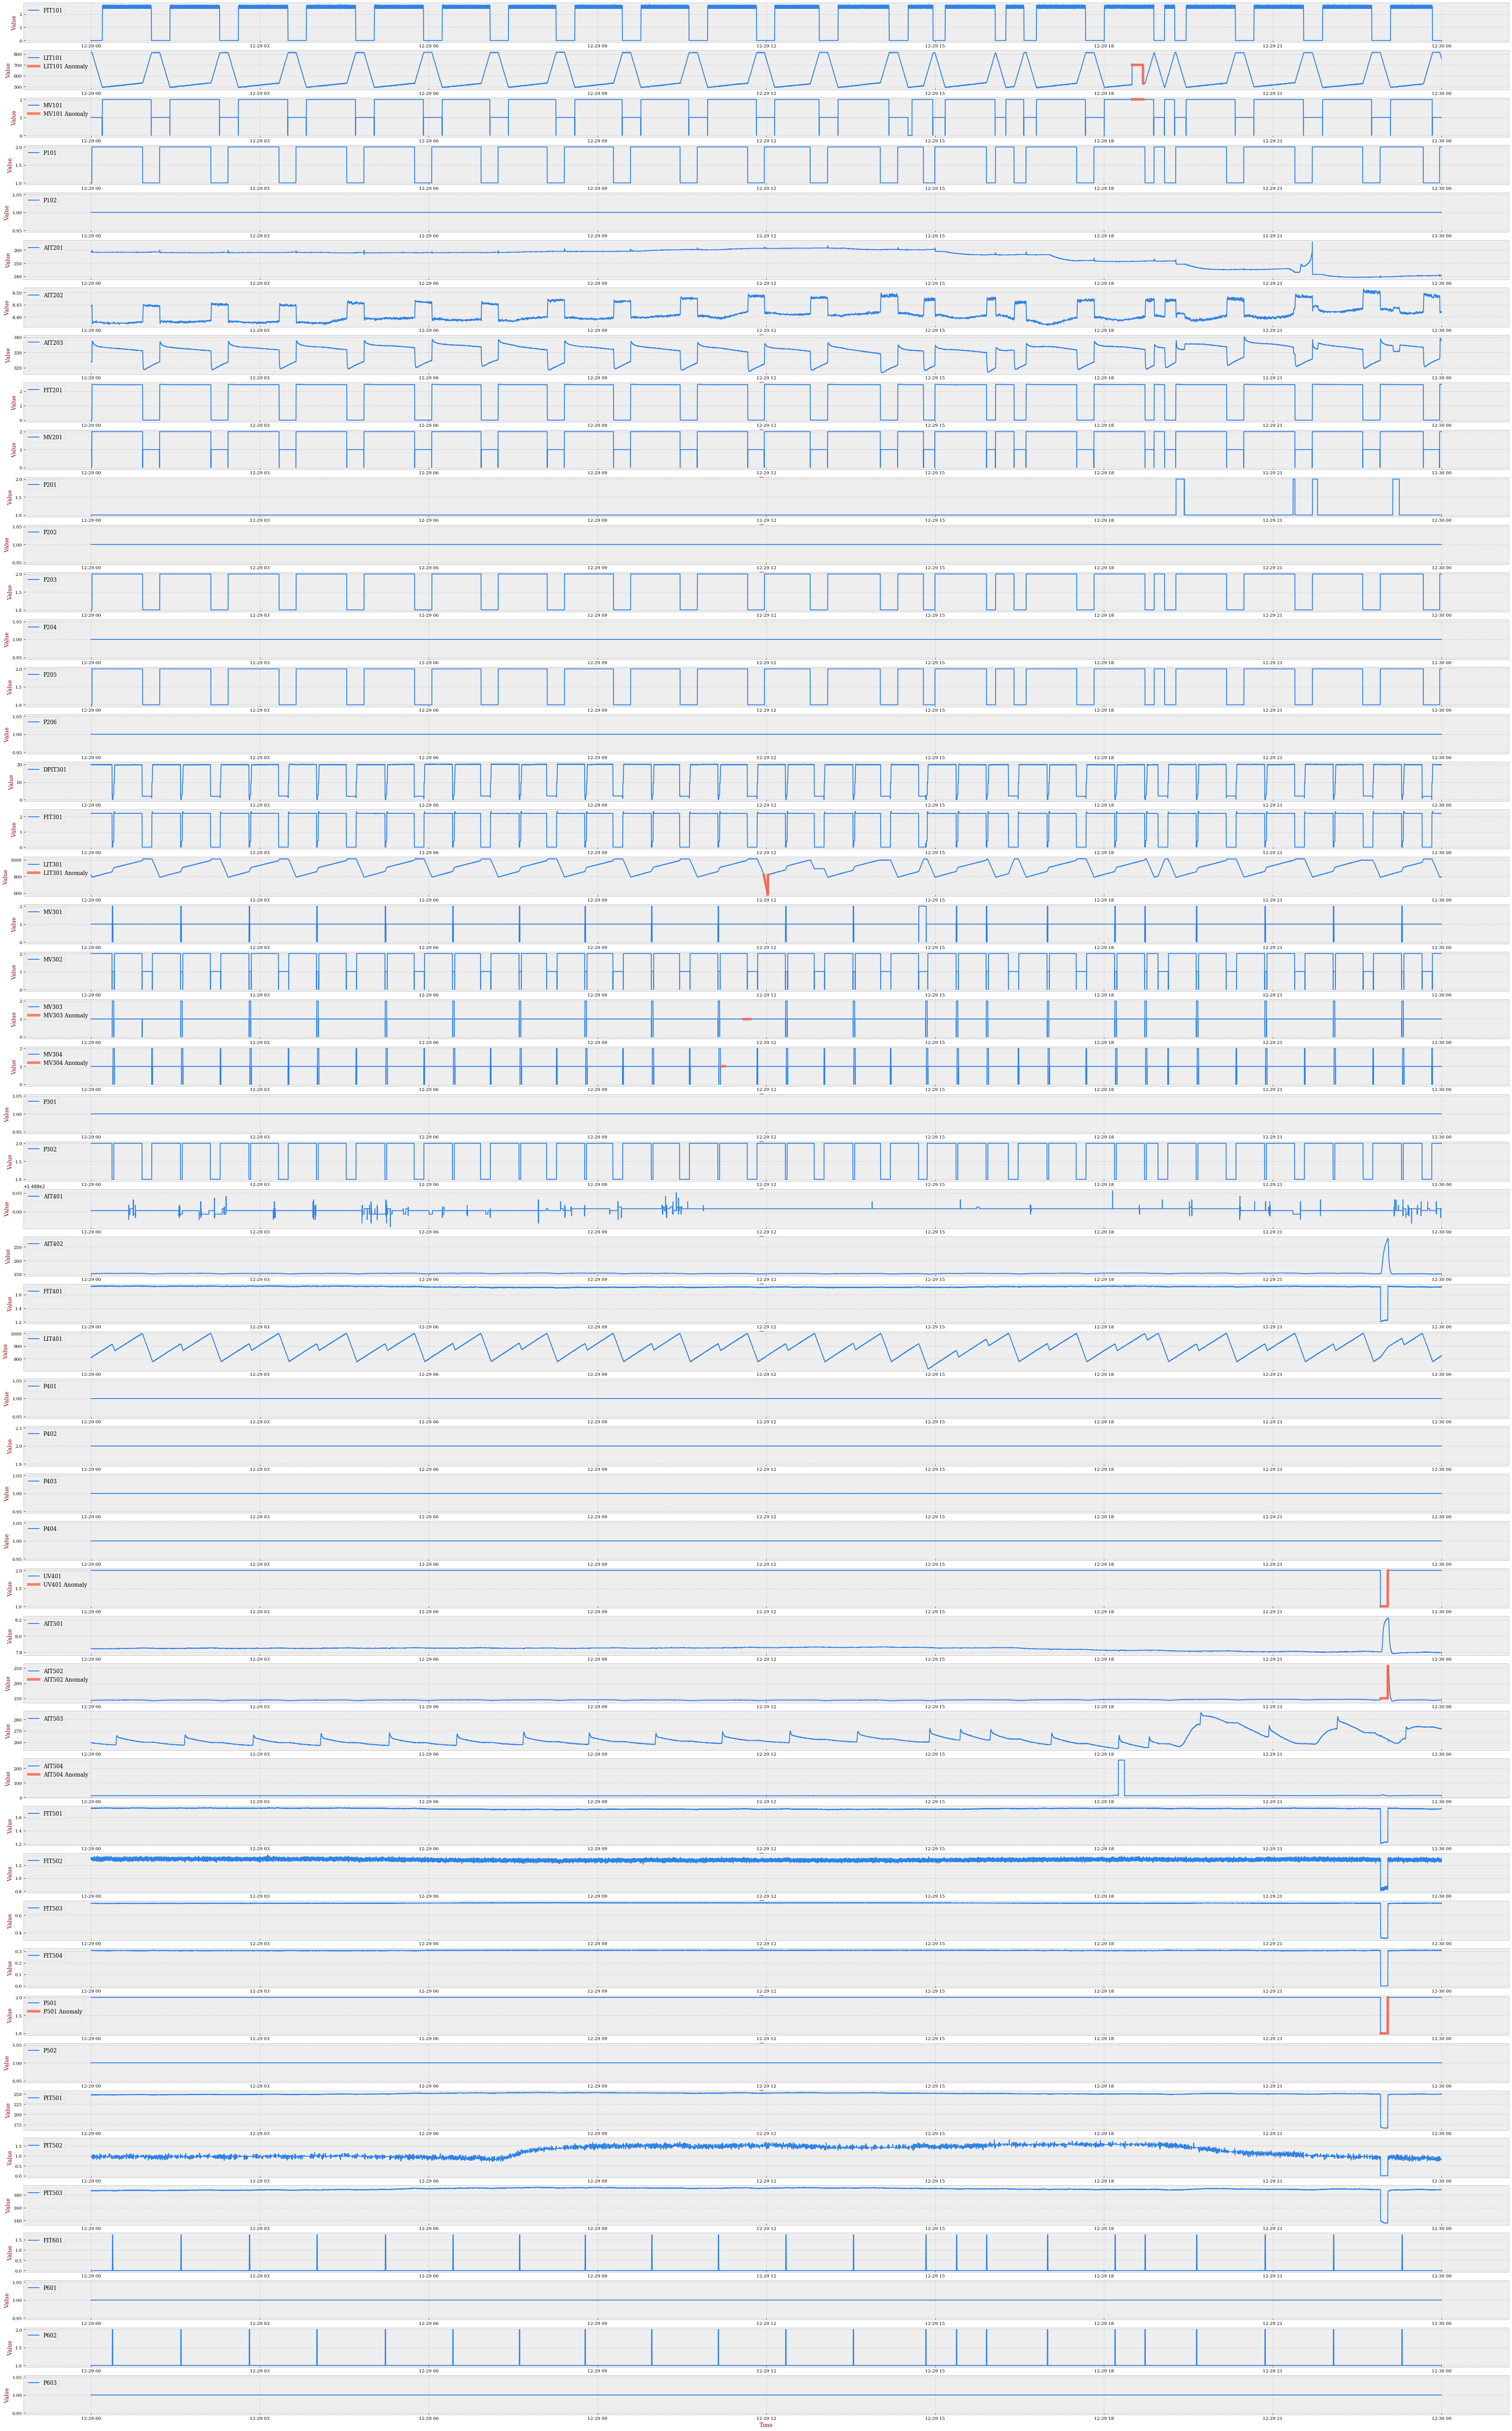

In [7]:
x = time_start + np.arange(0, time_len, 1)
idx_start = int((time_start - df_time_start) / np.timedelta64(1, 's'))
idx_end = int((time_end - df_time_start) / np.timedelta64(1, 's'))

with plt.style.context('bmh'):
    font = {
        'color': 'darkred', 
        'size': 12, 
        'family': 'serif'
    }
    font_legend = {
        'size': 12, 
        'family': 'serif'
    }

    fig, axs = plt.subplots(51, 1, figsize=(60, 100))

    for i in range(51):
        axs[i].plot(x, df.iloc[idx_start:idx_end, i+1], label=df.columns[i+1], color='#2f83e4')

        axs[i].set_xlabel('Time', fontdict=font)
        axs[i].set_ylabel('Value', fontdict=font)
        axs[i].legend(loc='upper left', prop=font_legend)
        labels = axs[i].get_xticklabels() + axs[i].get_yticklabels()
        [ label.set_fontname('serif') for label in labels ]

        if df.columns[i+1] in anomaly_feature:
            idx = anomaly_feature.index(df.columns[i+1])
            anomaly_idx = anomaly_time_start[idx] + np.arange(0, int((anomaly_time_end[idx] - anomaly_time_start[idx])/np.timedelta64(1, 's')), 1)
            anomaly_idx_start = int((anomaly_time_start[idx] - time_start)/np.timedelta64(1, 's'))
            anomaly_idx_end = int((anomaly_time_end[idx] - time_start)/np.timedelta64(1, 's'))
            axs[i].plot(anomaly_idx, df.iloc[idx_start + anomaly_idx_start:idx_start + anomaly_idx_end, i+1], label='{} Anomaly'.format(df.columns[i+1]), color='tomato', linewidth=6, alpha=0.8)
            axs[i].legend(loc='upper left', prop=font_legend)

plt.savefig('../output/swat-2015.png')